In [1]:
import csv
import os
import numpy as np
import cv2
import keras

train_seq = ['00', '01', '02', '03', '04', '05', '06', '07', '08']
valid_seq = ['09', '10']

data_path = "/media/Data/kitti_dataset/dataset/sequences/"
  
train_set = []
valid_set = []

for i in range(len(train_seq)):
    with open(data_path + str(train_seq[i]) + "/speed.txt", 'r') as h:
        lines = h.readlines()

    dataset = []
    images_path = sorted(os.listdir(data_path + str(train_seq[i]) + "/image_2"))

    # original direction
    for j in range(len(lines)):
        speed_val = float(lines[j].strip())
        dataset.append({"image": data_path+str(train_seq[i])+"/image_2/"+images_path[j+1], "speed": speed_val/15.0 - 1})
    
    train_set.append(dataset)
#     dataset = []

#     # opposite direction
#     for j in range(len(lines)):
#         speed_val = float(lines[len(lines) - 1 - j].strip())
#         dataset.append({"image": data_path+str(train_seq[i])+"/image_2/"+images_path[len(lines) - 1 - j + 1], "speed": -speed_val/30})
    
#     train_set.append(dataset)
    
    print(len(dataset))

print(train_set[2][5])
    
for i in range(len(valid_seq)):
    with open(data_path + str(valid_seq[i]) + "/speed.txt", 'r') as h:
        lines = h.readlines()

    dataset = []
    images_path = sorted(os.listdir(data_path + str(valid_seq[i]) + "/image_2"))

    for j in range(len(lines)):
        speed_val = float(lines[j].strip())
        dataset.append({"image": data_path+str(valid_seq[i])+"/image_2/"+images_path[j+1], "speed": speed_val/15.0 - 1})
    
    valid_set.append(dataset)
#     dataset = []

#     # opposite direction
#     for j in range(len(lines)):
#         speed_val = float(lines[len(lines) - 1 - j].strip())
#         dataset.append({"image": data_path+str(valid_seq[i])+"/image_2/"+images_path[len(lines) - 1 - j + 1], "speed": -speed_val/30})
    
#     valid_set.append(dataset)
    print(len(dataset))
    
print(valid_set[1][6])


Using TensorFlow backend.


4540
1100
4660
800
270
2760
1100
1100
4070
{'speed': -0.031413045830065656, 'image': '/media/Data/kitti_dataset/dataset/sequences/02/image_2/000006.png'}
1590
1200
{'speed': -0.8591305180010952, 'image': '/media/Data/kitti_dataset/dataset/sequences/10/image_2/000007.png'}


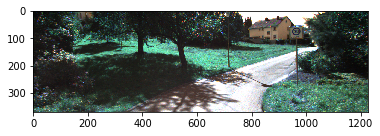

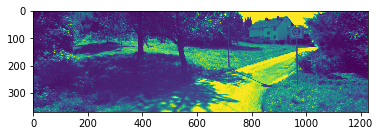

(370, 1226)


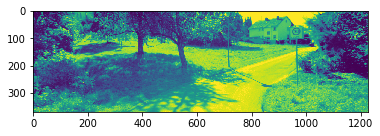

In [2]:
import matplotlib.pyplot as plt

img = cv2.imread(valid_set[1][44]['image'])[:, :]
plt.imshow(img)
plt.show()

img_b = cv2.imread(valid_set[1][44]['image'], 0)
plt.imshow(img_b)
plt.show()

equ = cv2.equalizeHist(img_b)
print(equ.shape)
#res = np.hstack((img_b, sat, equ))
plt.imshow(equ)
plt.show()

In [3]:
import matplotlib.pyplot as plt

cols = 1226
rows = 370

seq_len = 5
BATCH_SIZE = 10

print("train set has {} sequences".format(len(train_set)))
print("valid set has {} sequences".format(len(valid_set)))

def data_generator(dataset, seq_len):
    batch_seq_images = np.zeros((BATCH_SIZE, seq_len, rows, cols, 1))
    batch_seq_speed = np.zeros((BATCH_SIZE, seq_len, 1))

    while 1:
        for i in range(BATCH_SIZE):
            while 1:
                seq_index = np.random.randint(len(dataset))
                img_index = np.random.randint(len(dataset[seq_index]))
                if img_index + seq_len <= len(dataset[seq_index]):
                    seq_speed = []
                    seq_images = []
                    # add data augmentation
                    flip = np.random.randint(2)
                    for j in range(img_index, img_index + seq_len):
                        seq_speed.append(dataset[seq_index][j]["speed"])
                        img = cv2.imread(dataset[seq_index][j]["image"], 0)[:rows, :cols]
                        if (flip == 1): img = cv2.flip(img, 0)
                        img = cv2.equalizeHist(img)
                        #print(str(seq_index)+" "+str(j))
                        img = np.asarray(img).reshape(rows, cols, 1)
                        seq_images.append(img)
                    seq_speed = np.array(seq_speed)
                    seq_images = np.array(seq_images)
                    break
                else:
                    continue
            batch_seq_images[i] = seq_images
            batch_seq_speed[i] = seq_speed.reshape(seq_len, 1)

        # use # for complete seq out
        yield batch_seq_images, batch_seq_speed#[:, -1, :]

train set has 9 sequences
valid set has 2 sequences


In [4]:
sample_gen = data_generator(train_set, seq_len)
x, y = next(sample_gen)
print(y)

[[[-0.53365966]
  [-0.54161086]
  [-0.53761806]
  [-0.53359591]
  [-0.53428643]]

 [[ 0.70680509]
  [ 0.70776555]
  [ 0.70890544]
  [ 0.71061265]
  [ 0.71027189]]

 [[-0.71893621]
  [-0.72500961]
  [-0.72656966]
  [-0.73319703]
  [-0.72395967]]

 [[-0.99843155]
  [-0.96668509]
  [-0.97736178]
  [-0.9797356 ]
  [-0.97786825]]

 [[ 0.5328178 ]
  [ 0.53740025]
  [ 0.53858093]
  [ 0.54067663]
  [ 0.54096252]]

 [[-0.08132434]
  [-0.08370303]
  [-0.08422925]
  [-0.09160202]
  [-0.09516513]]

 [[-0.43200673]
  [-0.44188642]
  [-0.45034459]
  [-0.45578542]
  [-0.46692002]]

 [[-0.60186977]
  [-0.59149594]
  [-0.58140567]
  [-0.57133389]
  [-0.55997048]]

 [[-0.58789751]
  [-0.60396737]
  [-0.57441454]
  [-0.56420738]
  [-0.55345896]]

 [[-0.13102046]
  [-0.13045324]
  [-0.13629345]
  [-0.13294206]
  [-0.13423027]]]


In [5]:
from keras.models import Sequential, Model
from keras.layers.core import Lambda, Dense, Activation, Flatten, Dropout
from keras.layers.convolutional import Cropping2D, Convolution2D, MaxPooling2D, AveragePooling2D
from keras.layers.advanced_activations import ELU
from keras.layers.recurrent import GRU, LSTM
from keras.layers.normalization import BatchNormalization
from keras.layers.wrappers import TimeDistributed
from keras.optimizers import Adam, RMSprop

print("\nBuilding and compiling the model ...")

model = Sequential()
# Preprocess incoming data, centered around zero with small standard deviation 
model.add(TimeDistributed(Lambda(lambda x: (x / 127.5) - 1.0), input_shape=(None, rows, cols, 1)))
# Block - conv
model.add(TimeDistributed(Convolution2D(1, 11, 11, border_mode='valid', subsample=[3, 3], init='glorot_uniform', name='Conv1')))
#model.add(TimeDistributed(BatchNormalization(axis=1)))
model.add(Activation('relu'))
# Block - conv
model.add(TimeDistributed(Convolution2D(4, 7, 7, border_mode='valid', init='glorot_uniform', name='Conv2')))
#model.add(TimeDistributed(BatchNormalization(axis=1)))
model.add(Activation('relu'))
# Block - conv
model.add(TimeDistributed(Convolution2D(8, 7, 7, border_mode='valid', init='glorot_uniform', name='Conv3')))  
#model.add(TimeDistributed(BatchNormalization(axis=1)))
model.add(Activation('relu'))
# Block - conv
# model.add(TimeDistributed(Convolution2D(1, 5, 5, border_mode='valid', init='glorot_uniform', name='Conv4')))
# #model.add(TimeDistributed(BatchNormalization(axis=1)))
# model.add(Activation('relu'))
# #Block - conv
# model.add(TimeDistributed(Convolution2D(1, 5, 5, border_mode='valid', init='glorot_uniform', name='Conv5')))
# #model.add(TimeDistributed(BatchNormalization(axis=1)))
# model.add(Activation('relu'))
# #Block - conv
# model.add(TimeDistributed(Convolution2D(1, 5, 5, border_mode='valid', init='glorot_uniform', name='Conv6')))
# #model.add(TimeDistributed(BatchNormalization(axis=1)))
# model.add(Activation('relu'))
# #Block - conv
# model.add(TimeDistributed(Convolution2D(1, 3, 3, border_mode='valid', init='glorot_uniform', name='Conv7')))
# #model.add(TimeDistributed(BatchNormalization(axis=1)))
# model.add(Activation('relu'))
# #Block - conv
# model.add(TimeDistributed(Convolution2D(1, 3, 3, border_mode='valid', init='glorot_uniform', name='Conv8')))
# #model.add(TimeDistributed(BatchNormalization(axis=1)))
# model.add(Activation('relu'))
# #Block - conv
# model.add(TimeDistributed(Convolution2D(1, 3, 3, border_mode='valid', init='glorot_uniform', name='Conv9')))
# #model.add(TimeDistributed(BatchNormalization(axis=1)))
# model.add(Activation('relu'))

#model.add(TimeDistributed(MaxPooling2D((3,3),(2,2),'valid', name='pool3')))

#model.add(TimeDistributed(AveragePooling2D((4,4),(4,4),'valid', name='pool1')))
model.add(TimeDistributed(Flatten(name='flat')))
#model.add(Activation('relu'))
model.add(TimeDistributed(Dropout(0.60)))
model.add(TimeDistributed(Dense(128, init='glorot_uniform', name='fc1')))
model.add(Activation('relu'))
model.add(LSTM(16, return_sequences=True, init='glorot_uniform', inner_init='glorot_uniform', activation='relu',
             name='GRU1'))
#model.add(Dropout(0.50))
model.add(Dense(1, name='output')) 
model.summary()

adam = Adam(lr=0.0001)
#rmsprop = RMSprop()
model.compile(loss='mean_squared_error', optimizer=adam)

print("\nSaving Model...")
model_json = model.to_json()
with open("../data/weights/kitti_speed/model.json", "w") as json_file:
    json_file.write(model_json)


Building and compiling the model ...
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
timedistributed_1 (TimeDistribut (None, None, 370, 122 0           timedistributed_input_1[0][0]    
____________________________________________________________________________________________________
timedistributed_2 (TimeDistribut (None, None, 120, 406 122         timedistributed_1[0][0]          
____________________________________________________________________________________________________
activation_1 (Activation)        (None, None, 120, 406 0           timedistributed_2[0][0]          
____________________________________________________________________________________________________
timedistributed_3 (TimeDistribut (None, None, 114, 400 200         activation_1[0][0]               
_____________________________________________________

In [6]:
import keras
from keras.callbacks import Callback
from keras.callbacks import TensorBoard
from keras.callbacks import ModelCheckpoint
import math

class LifeCycleCallBack(keras.callbacks.Callback):

    def on_epoch_begin(self, epoch, logs={}):
        pass

    def on_epoch_end(self, epoch, logs={}):
        pass

    def on_batch_begin(self, batch, logs={}):
        pass

    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))

    def on_train_begin(self, logs={}):
        print('Beginning training')
        self.losses = []

    def on_train_end(self, logs={}):
        print('Ending Training')


NUM_EPOCHS = 250
        
lifecycle_callback = LifeCycleCallBack()

tensorboard = keras.callbacks.TensorBoard(log_dir='../data/logs/kitti_speed/', histogram_freq=1, 
                                          write_graph=True, write_images=True)

checkpoint = keras.callbacks.ModelCheckpoint("../data/weights/kitti_speed/model.h5", monitor='val_loss', verbose=0, 
                                             save_best_only=True, save_weights_only=True, mode='auto', period=1)

train_generator = data_generator(train_set, seq_len)
valid_generator = data_generator(valid_set, seq_len)

samples_per_epoch = math.ceil((20000 - seq_len)/(seq_len*BATCH_SIZE))
nb_val_samples = math.ceil((3000 - seq_len)/(seq_len*BATCH_SIZE))*BATCH_SIZE


# print("\nSaving Model...")

# model_json = model.to_json()
# with open("../data/weights/kitti_speed/model.json", "w") as json_file:
#     json_file.write(model_json)

# #model.save_weights("model.h5")
# print("Model Saved.")

history = model.fit_generator(train_generator,
                              validation_data = valid_generator,
                              samples_per_epoch = samples_per_epoch,
                              nb_val_samples = nb_val_samples,
                              nb_epoch = NUM_EPOCHS, verbose = 1, 
                              callbacks = [lifecycle_callback, checkpoint])

print("\nTraining the model ended.")

Beginning training
Epoch 1/250
400/400 [==============================] - 57s - loss: 0.1233 - val_loss: 0.0641
Epoch 2/250
400/400 [==============================] - 52s - loss: 0.0824 - val_loss: 0.0685
Epoch 3/250
400/400 [==============================] - 52s - loss: 0.0750 - val_loss: 0.0765
Epoch 4/250
400/400 [==============================] - 52s - loss: 0.0604 - val_loss: 0.0579
Epoch 5/250
400/400 [==============================] - 51s - loss: 0.0618 - val_loss: 0.0682
Epoch 6/250
400/400 [==============================] - 51s - loss: 0.0412 - val_loss: 0.0697
Epoch 7/250
400/400 [==============================] - 51s - loss: 0.0444 - val_loss: 0.0635
Epoch 8/250
400/400 [==============================] - 51s - loss: 0.0447 - val_loss: 0.0731
Epoch 9/250
400/400 [==============================] - 51s - loss: 0.0362 - val_loss: 0.0665
Epoch 10/250
400/400 [==============================] - 51s - loss: 0.0362 - val_loss: 0.0567
Epoch 11/250
400/400 [============================

400/400 [==============================] - 51s - loss: 0.0111 - val_loss: 0.0456
Epoch 89/250
400/400 [==============================] - 51s - loss: 0.0102 - val_loss: 0.0449
Epoch 90/250
400/400 [==============================] - 51s - loss: 0.0083 - val_loss: 0.0455
Epoch 91/250
400/400 [==============================] - 51s - loss: 0.0086 - val_loss: 0.0514
Epoch 92/250
400/400 [==============================] - 51s - loss: 0.0127 - val_loss: 0.0532
Epoch 93/250
400/400 [==============================] - 51s - loss: 0.0137 - val_loss: 0.0452
Epoch 94/250
400/400 [==============================] - 51s - loss: 0.0089 - val_loss: 0.0447
Epoch 95/250
400/400 [==============================] - 51s - loss: 0.0083 - val_loss: 0.0495
Epoch 96/250
400/400 [==============================] - 51s - loss: 0.0153 - val_loss: 0.0518
Epoch 97/250
400/400 [==============================] - 51s - loss: 0.0107 - val_loss: 0.0441
Epoch 98/250
400/400 [==============================] - 51s - loss: 0.008

400/400 [==============================] - 51s - loss: 0.0066 - val_loss: 0.0450
Epoch 175/250
400/400 [==============================] - 51s - loss: 0.0049 - val_loss: 0.0439
Epoch 176/250
400/400 [==============================] - 51s - loss: 0.0055 - val_loss: 0.0492
Epoch 177/250
400/400 [==============================] - 51s - loss: 0.0050 - val_loss: 0.0495
Epoch 178/250
400/400 [==============================] - 51s - loss: 0.0066 - val_loss: 0.0450
Epoch 179/250
400/400 [==============================] - 51s - loss: 0.0070 - val_loss: 0.0518
Epoch 180/250
400/400 [==============================] - 51s - loss: 0.0118 - val_loss: 0.0501
Epoch 181/250
400/400 [==============================] - 51s - loss: 0.0058 - val_loss: 0.0485
Epoch 182/250
400/400 [==============================] - 51s - loss: 0.0075 - val_loss: 0.0451
Epoch 183/250
400/400 [==============================] - 51s - loss: 0.0054 - val_loss: 0.0466
Epoch 184/250
400/400 [==============================] - 51s - l

In [7]:
model.save_weights("../data/weights/kitti_speed/model.h5")
print("Model Saved.")

Model Saved.
